# Imports

In [1]:
from jmetal.problem import ZDT1, ZDT3
from jmetal.algorithm.multiobjective.gde3 import GDE3
from jmetal.util.termination_criterion import StoppingByEvaluations

from pymoo.factory import get_problem
import matplotlib.pyplot as plt
import numpy as np

from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

# Def de funções

In [2]:
def runner_gde3(zdt_problem, 
                max_evaluations = 1000, 
                population_size=100, 
                crossover_rate=0.5, 
                convergency_rate=0.5):
    
    algorithm = GDE3(
        problem=zdt_problem,
        population_size=population_size,
        cr=crossover_rate,
        f=convergency_rate,
        termination_criterion=StoppingByEvaluations(max_evaluations)
    )

    algorithm.run()
    solutions = algorithm.get_result()
    return solutions

In [11]:
def plot_comparsion(zdt_problem_name, 
                    gde3_front,  
                    num_generations, 
                    convergency_rate):
    
    zdt_dominant_solutions = get_problem(zdt_problem_name.lower()).pareto_front()
    zdt_x = zdt_dominant_solutions[:,0]
    zdt_y = zdt_dominant_solutions[:,1]
    
    gde3_dominant_solutions = np.array([i.objectives for i in gde3_front])
    gde3_x = gde3_dominant_solutions[:,0]
    gde3_y = gde3_dominant_solutions[:,1]

    plt.scatter(gde3_x, gde3_y, marker='X',s=20, facecolors='none', edgecolors='b')
    plt.scatter(zdt_x, zdt_y, marker='X',s=20, facecolors='none', edgecolors='r')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('GDE3 + {}\n Generations = {}, Convergency Rate (F) = {}'.format(
        zdt_problem_name.upper(), 
        num_generations, 
        convergency_rate
    ))
    plt.legend([
        'GDE3 Dominant Solutions', 
        '{} Dominant Solutions'.format(zdt_problem_name.upper())
    ])
    
    fig = plt.gcf()
    plt.show()
    plt.draw()
    fig.savefig('./plots/gde3_{}_gen{}_f{}.png'.format(
        zdt_problem_name, 
        num_generations, 
        str(convergency_rate).replace('.','_')), 
                dpi=100)


In [4]:
def gde3_zdt_benchmarking(zdt_problem, num_generations, convergency_rate):
    gde3_solutions = runner_gde3(zdt_problem, max_evaluations=num_generations, convergency_rate=convergency_rate)
    gde3_front = get_non_dominated_solutions(gde3_solutions)
    
    zdt_problem_name = zdt_problem.get_name().lower()
    plot_comparsion(
        zdt_problem_name,
        gde3_front, 
        num_generations,
        convergency_rate
    )

# Experimentos GDE3 + ZDT1

## 1000 Generations

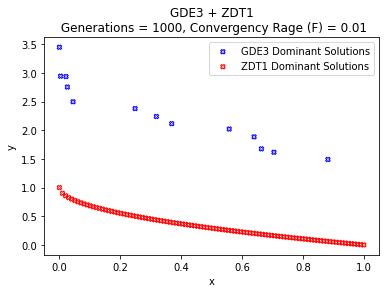

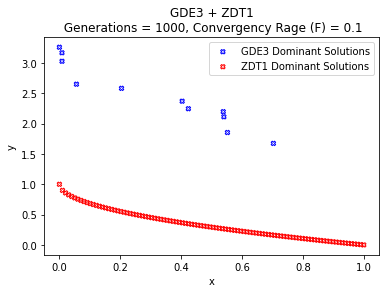

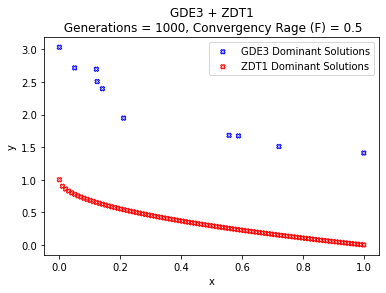

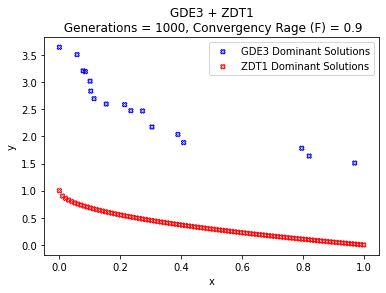

<Figure size 432x288 with 0 Axes>

In [5]:
zdt_problem = ZDT1()

num_generations = 1000
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.01)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.1)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.5)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.9)

## 5000 Generations

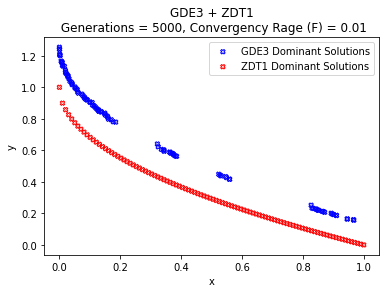

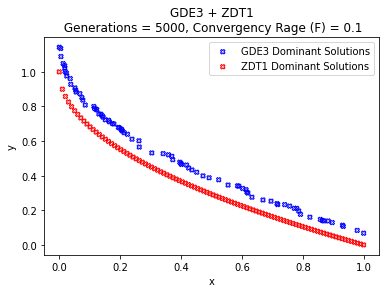

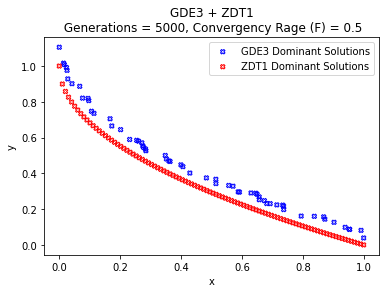

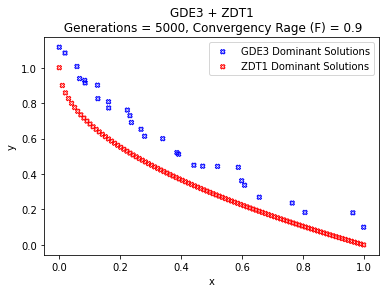

<Figure size 432x288 with 0 Axes>

In [6]:
zdt_problem = ZDT1()

num_generations = 5000
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.01)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.1)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.5)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.9)

## 10 000 Generations

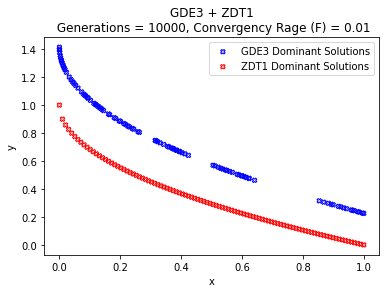

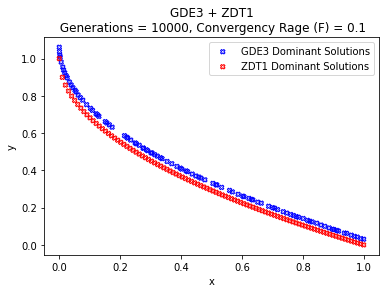

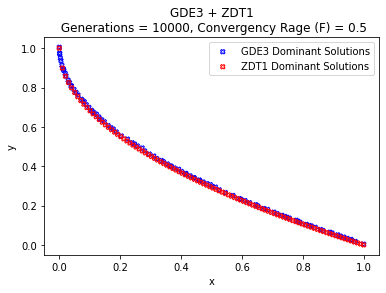

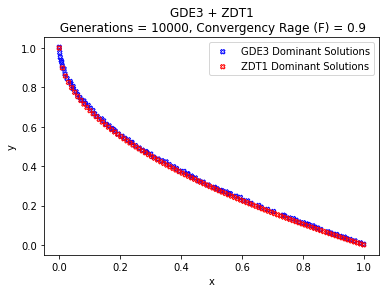

<Figure size 432x288 with 0 Axes>

In [7]:
zdt_problem = ZDT1()

num_generations = 10000
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.01)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.1)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.5)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.9)

# Experimentos GDE3 + ZDT3

# 1000 Generations

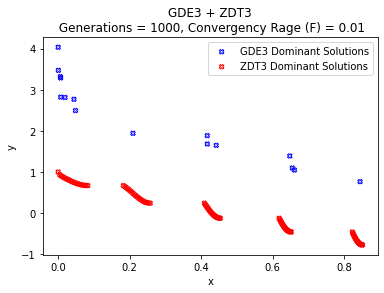

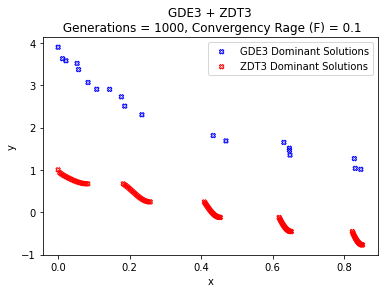

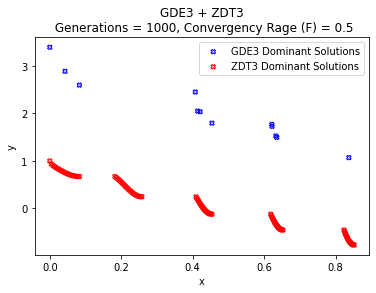

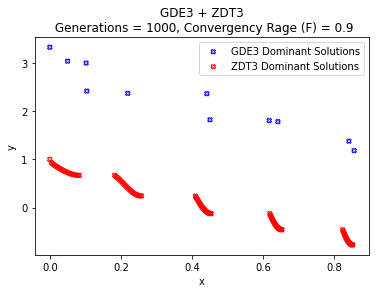

<Figure size 432x288 with 0 Axes>

In [8]:
zdt_problem = ZDT3()

num_generations = 1000
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.01)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.1)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.5)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.9)

# 5000 Generations

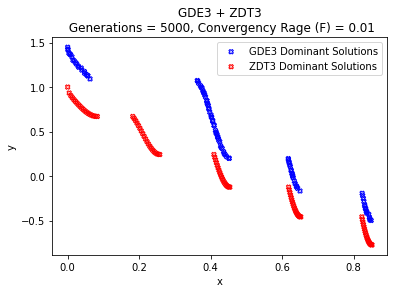

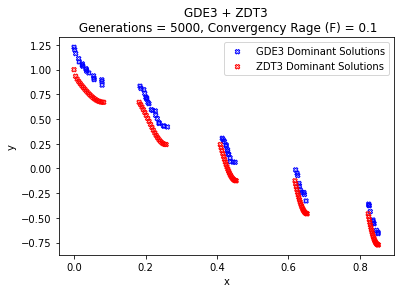

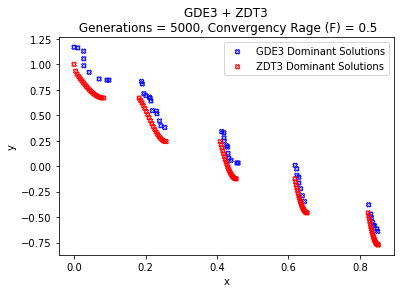

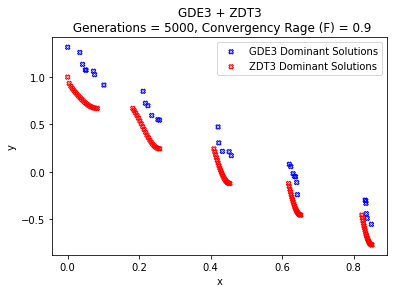

<Figure size 432x288 with 0 Axes>

In [9]:
zdt_problem = ZDT3()

num_generations = 5000
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.01)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.1)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.5)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.9)

# 10 000 Generations

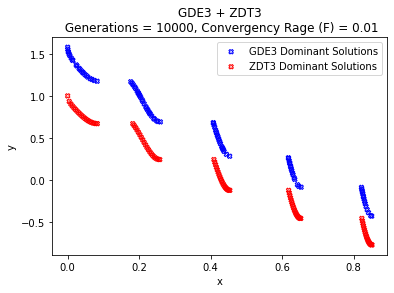

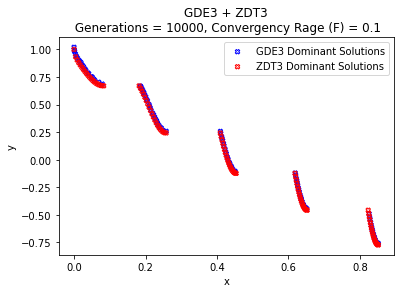

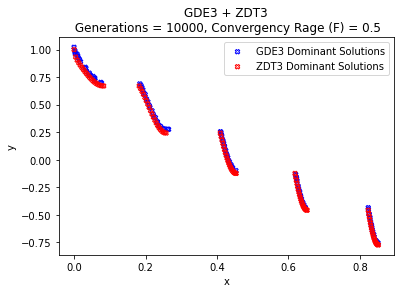

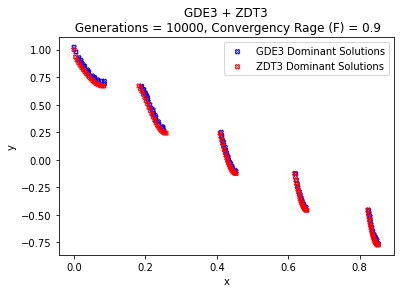

<Figure size 432x288 with 0 Axes>

In [10]:
zdt_problem = ZDT3()

num_generations = 10000
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.01)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.1)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.5)
gde3_zdt_benchmarking(zdt_problem=zdt_problem, num_generations=num_generations, convergency_rate=0.9)